<a href="https://colab.research.google.com/github/ishneha1/AI_practice/blob/main/DataScience_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

In [2]:
spark = SparkSession.builder.appName("Task").getOrCreate()

In [3]:
# reading dataset
flying = spark.read.csv("/content/flying_1671498679775.csv", header = True, inferSchema = True)

In [4]:
# counting frequency groups
frequency_counts = (
    flying
    .groupBy("frequency")
    .count()
    .orderBy(col("count").desc())
)

In [5]:
# Conversion into pandas
pand = frequency_counts.toPandas()

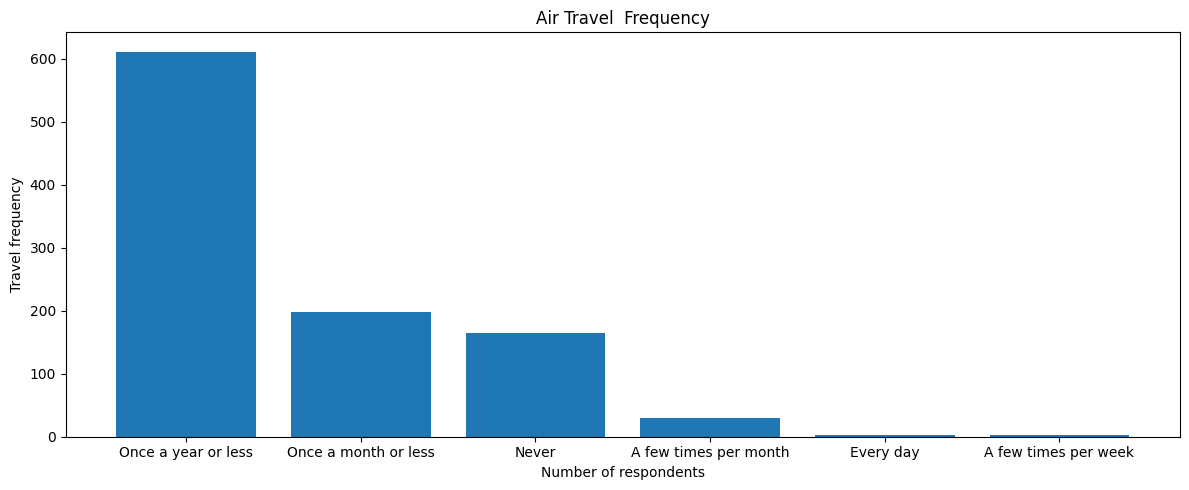

In [7]:
# visualization using matplotlib
plt.figure(figsize=(12, 5))
plt.bar(pand["frequency"], pand["count"])
plt.title("Air Travel  Frequency")
plt.xlabel("Number of respondents")
plt.ylabel("Travel frequency")
plt.tight_layout()
plt.show()

It shows that around 600 people travel at least once a year, making it the highest figure in this dataset. The next most prevalent category is once a month or fewer, which includes approximately 200 people. Furthermore, this dataset shows that around 180 people have never flown in an airplane. Finally, the number of persons flying daily or a few times weekly is quite small, making it unimportant.

## Part b) Children and Attitudes Toward Babies on Planes

In [8]:
clean_data = flying.dropna(
    subset=["children_under_18", "baby"]
)

In [9]:
df = (
 clean_data
    .groupBy("children_under_18", "baby")
    .count()
    .orderBy("children_under_18", "baby")
)

# pandas conversion
datafram = df.toPandas()

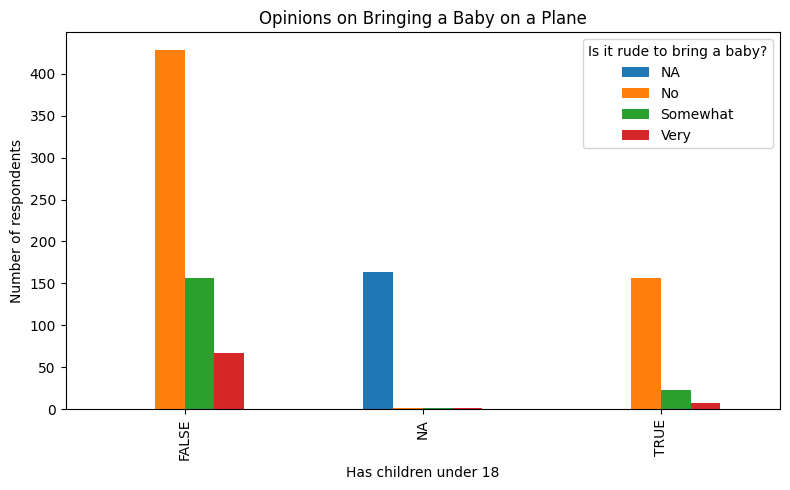

In [11]:
pivot_df = datafram.pivot(
    index="children_under_18",
    columns="baby",
    values="count"
)

pivot_df.plot(
    kind="bar",
    figsize=(8, 5)
)

plt.title("Opinions on Bringing a Baby on a Plane")
plt.xlabel("Has children under 18")
plt.ylabel("Number of respondents")
plt.legend(title="Is it rude to bring a baby?")

plt.tight_layout()
plt.show()

## Individuals without children frequently argue that traveling with a baby on an airplane is not unfriendly. Others describe it as mildly or excessively unpleasant. The majority of those with children say it is not disrespectful, although fewer of them find it rude than those without children. Parents and non-parents hold different opinions. Parents are more willing to take newborns on airlines. Meanwhile, non-parents may consider it unpleasant to bring infants on a flight.

## Part c) Age Groups and Reclining Seats Behavior

In [12]:
df2 = flying.filter(
    col("age").isNotNull() & col("recline_rude").isNotNull()
)

In [13]:
contingency_table = (
    df2
    .groupBy("age", "recline_rude")
    .count()
    .orderBy("age")
)

contingency_table.show()


+-----+------------+-----+
|  age|recline_rude|count|
+-----+------------+-----+
|18-29|          No|   78|
|18-29|        Very|   20|
|18-29|          NA|   48|
|18-29|    Somewhat|   74|
|30-44|        Very|   15|
|30-44|          No|  143|
|30-44|    Somewhat|   64|
|30-44|          NA|   32|
|45-60|          No|  140|
|45-60|    Somewhat|   80|
|45-60|          NA|   41|
|45-60|        Very|   14|
| > 60|          No|  133|
| > 60|    Somewhat|   61|
| > 60|          NA|   43|
| > 60|        Very|   21|
+-----+------------+-----+



In [14]:
age_total = (
    df2
    .groupBy("age")
    .count()
    .withColumnRenamed("count", "total")
)
age_rude = (
    df2
    .filter(col("recline_rude").isin("Somewhat", "Very"))
    .groupBy("age")
    .count()
    .withColumnRenamed("count", "rude_count")
)


In [15]:
rude_percent = (
   age_total
    .join(age_rude, on="age", how="left")
    .fillna(0, subset=["rude_count"])
    .withColumn(
        "rude_percent",
        round((col("rude_count") / col("total")) * 100, 2)
    )
    .orderBy("age")
)

rude_percent.show()


+-----+-----+----------+------------+
|  age|total|rude_count|rude_percent|
+-----+-----+----------+------------+
|18-29|  220|        94|       42.73|
|30-44|  254|        79|        31.1|
|45-60|  275|        94|       34.18|
| > 60|  258|        82|       31.78|
+-----+-----+----------+------------+



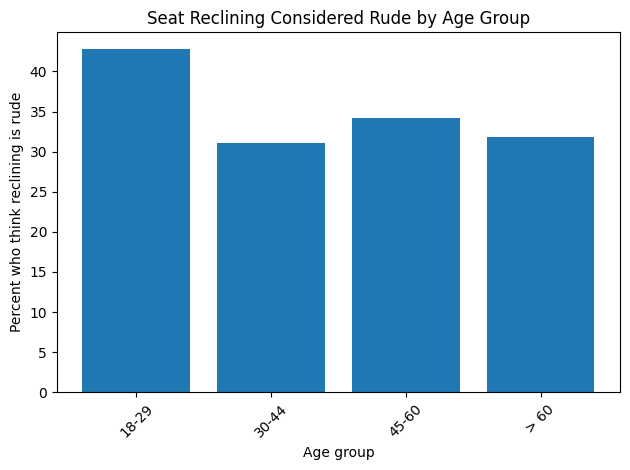

In [16]:
pdf = rude_percent.select("age", "rude_percent").toPandas()
plt.figure()
plt.bar(pdf["age"], pdf["rude_percent"])
plt.xlabel("Age group")
plt.ylabel("Percent who think reclining is rude")
plt.title("Seat Reclining Considered Rude by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The younger population (18-29) has a higher proportion of participants who consider seat reclining disrespectful. Respondents between the ages of 30-44 and above 60 are more likely to believe that reclining is not particularly disrespectful. In general, younger age groups exhibit a slightly larger tolerance for reclining than mid- to older age groups.

# Part d) Alcohol Consumption and General Rudeness Perceptions

N/A: There are no columns for alcohol consumption and rudeness perception